<a href="https://colab.research.google.com/github/Aryan1633/Avatar_Generation-from-Real-Images-using-Deep-Learning/blob/main/Avatar_Generation_from_Real_Images_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Load the real image
image_path = '/content/drive/MyDrive/IMG-20230609-WA0004.jpg'  # Replace with your image's path

# Load the image and check if it loaded successfully
image = cv2.imread(image_path)
if image is None:
    print(f"Error: Could not load the image from {image_path}")
else:
    # Display the real image
    print("Real Image:")
    cv2_imshow(image)

Real Image:


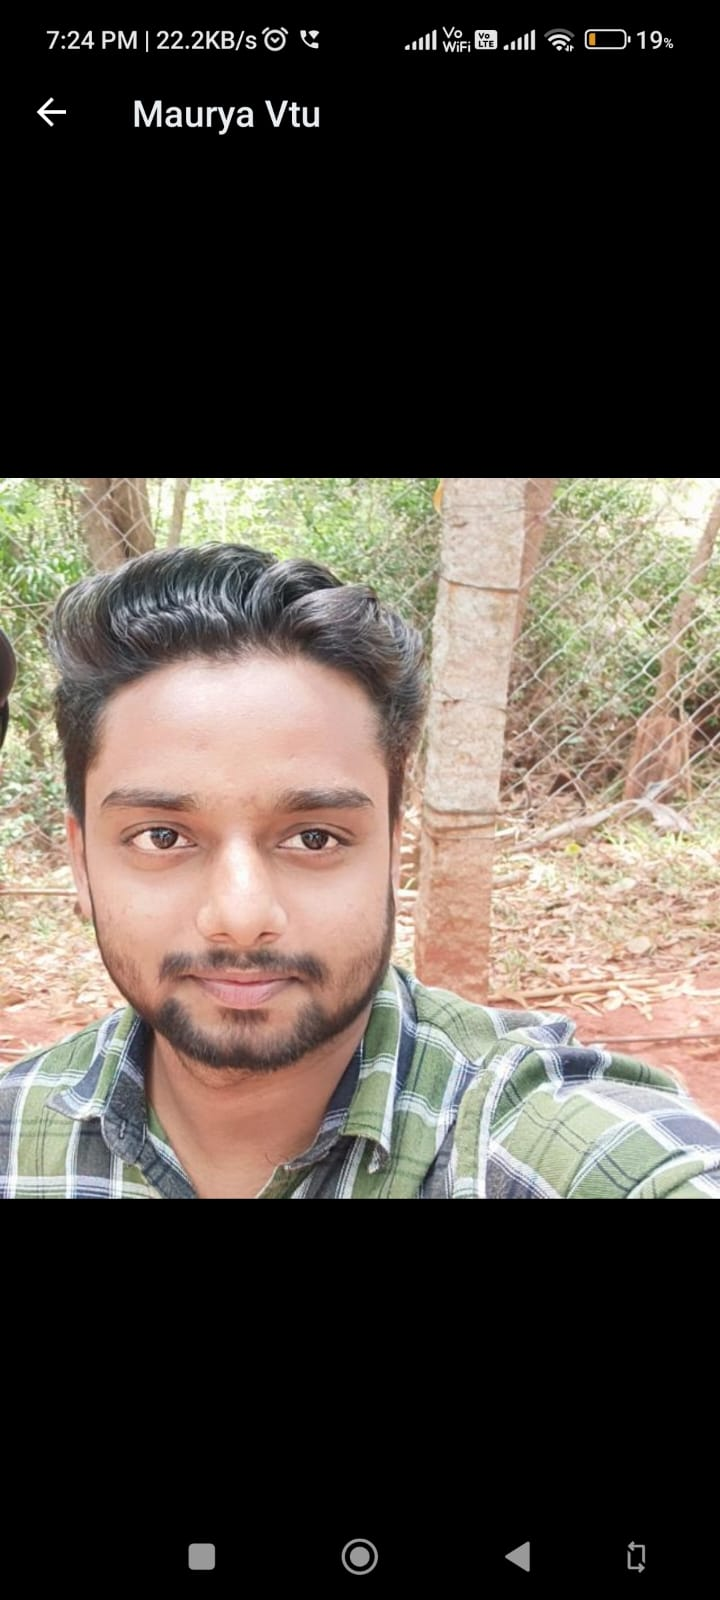

Avatar:


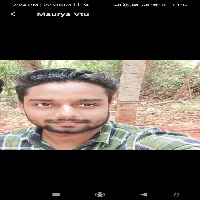

In [14]:
# Step 2: Resize the image to create an avatar (adjust the size as needed)
    avatar = cv2.resize(image, (200, 200))  # Adjust the size as needed

    # Display the avatar
    print("Avatar:")
    cv2_imshow(avatar)


In [25]:
# Preprocess the image (e.g., resizing if needed)
# You can add preprocessing steps here as necessary
# For example, resizing to a specific width (e.g., 400 pixels):
desired_width = 400
aspect_ratio = image.shape[1] / image.shape[0]
desired_height = int(desired_width / aspect_ratio)
image = cv2.resize(image, (desired_width, desired_height))

In [21]:
#Implement the avatar generation function
def create_avatar(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a bilateral filter to smooth the image while preserving edges
    smooth = cv2.bilateralFilter(gray, d=9, sigmaColor=75, sigmaSpace=75)

    # Create an edge mask using adaptive thresholding
    edges = cv2.adaptiveThreshold(smooth, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)

    # Combine the edges with a color version of the image
    cartoon = cv2.bitwise_and(image, image, mask=edges)

    return cartoon


In [22]:
avatar = create_avatar(image)

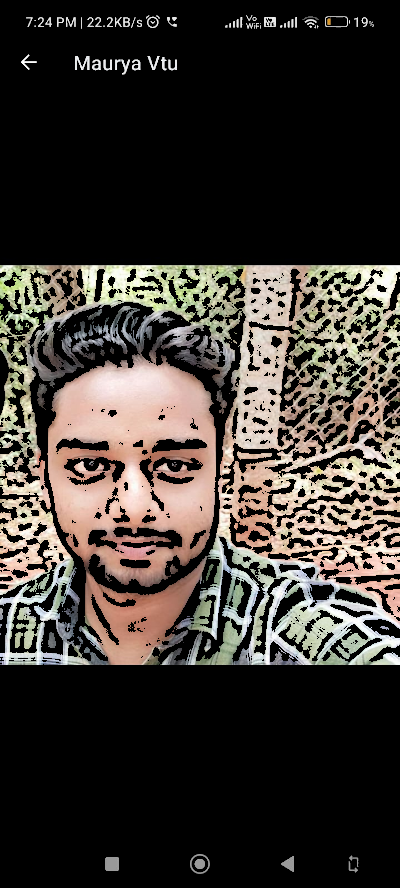

In [23]:
cv2_imshow(avatar)

In [24]:
# Step 6: Save the avatar (optional)
cv2.imwrite('avatar.jpg', avatar)  # Replace 'avatar.jpg' with your desired file name

True